# Random Forests  

Random forest is a bagging technique that trains multiple decision trees with minor modification in split criterion.  

`Algorithm:` [video link](https://youtu.be/CJ3KQYsJPVI?t=54)  

## Implementation  

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

In [2]:
# ?Counter

## Bagging (Bootstrap aggregation)  

In [3]:
def bag(X, y):
    # Counts the number of rows in th feature matrix
    n_samples = X.shape[0]

    # Generates a random sample from the given input
    indices = np.random.choice(n_samples, size=n_samples, replace=True, random_state=1)
    # Note that the second argument size has been set to the size of the 
    # original sample dataset and replacement has been set to True

    return X[indices], y[indices]

## Majority voting  

In [4]:
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

## Random forest class  

We create a `RandomForest` class with the following default parameters:  

* number of tree = 10  
* minimum number of samples = 2  
* maximum depth = 100  

The `max_features` is a configurable parameter that can be set by user.  

In [5]:
class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
        self.n_trees = n_trees  #hyperparameter for fixing the number of trees to be generated  
        self.min_samples_split = min_samples_split      #min number of samples required for split  
        self.max_depth = max_depth      #maximum depth of the decision tree 
        self.max_features = max_features    #maximum number of features to be considered
        self.trees = []

## Training random forest  

In [6]:
def fit(self, X, y):
    self.trees = []     # Empty array of tree which gets filled during operation  
    for _ in range(self.n_trees):   #we are using underscore we are just repeating operations  
        tree = DecisionTreeClassifier(  # We will now make a RF class inherit functions from sklearn
            min_samples_split=self.min_samples_split,
            max_depth=self.max_depth,
            max_features = self.max_features)
        X_sample, y_sample = bag(X, y)
        tree.fit(X_sample, y_sample)
        self.trees.apend(tree)      # We will append each of those trees.  

## Inference  

In [7]:
def predict(self, X):
    tree_predict = np.array([tree_predict(X) for tree in self.trees])   # converting a list to numpy has issues.  
    tree_predict= np.swapaxes(tree_predict, 0, 1)   # each of the trees will give out the prediction  
    y_pred = [most_common_label, 0, 1]
    return np.array(y_pred)

## Cleaned up code  

Combining the different components for creating the class  

In [15]:
def bag(X, y):
    n_samples = X.shape[0]      # Counts the number of rows in the feature matrix  
    indices = np.random.choice(n_samples, size=n_samples, replace=True)     # generates a random sample set
    # Note that the second argument size has been set to the size of the original sample dataset and replace is set to True
    return X[indices], y[indices]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
        self.n_trees = n_trees      # Hyperparameter for fixing the number of trees to be generated
        self.min_samples_split = min_samples_split      # min number of samples required for split
        self.max_depth = max_depth  # maximum depth of the decision tree
        self.max_features = max_features    # maximum number of features to be considered
        self.trees = []

    def fit(self, X, y):
        self.trees = []     # Empty array of tree which gets filled during operation
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(  # We will now make RF class inherit features from sklearn API
                min_samples_split=self.min_samples_split,
                max_depth = self.max_depth,
                max_features=self.max_features,
            random_state=1)
            X_sample, y_sample = bag(X, y)
            tree.fit(X_sample, y_sample)    # This fit method is on the sklearn tree object; this is not a recursion
            self.trees.append(tree) #we will append each of these tree

    def predict(self, X):
        tree_predict = np.array([tree.predict(X) for tree in self.trees])   #converting list to np array
        tree_predict = np.swapaxes(tree_predict, 0, 1)  # each of the trees will give out predictions
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict]
        return np.array(y_pred)


Let us demonstrate our implementation of RandomForest on a real world dataset.  

In [56]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = RandomForest(n_trees=10, max_depth=10, max_features='sqrt')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# print(y_test.shape, y_pred.shape)

acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.9473684210526315


Let us look at the confusion matrix and classification on the test set.  

In [57]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[37,  5],
       [ 1, 71]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



For a more visual representation. let us see the heatmatp  

Text(69.0, 0.5, 'Truth')

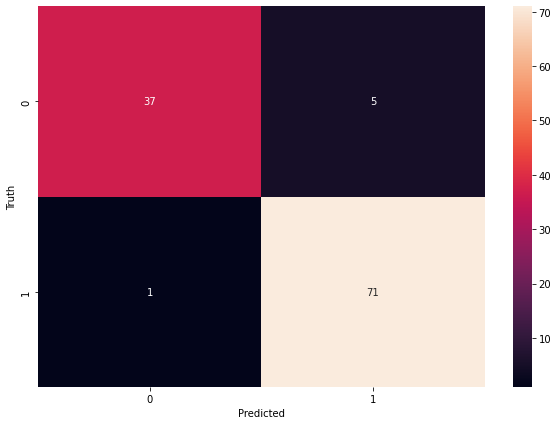

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')